# __Midsemester Exam Answers__

In [1]:
import numpy as np
from Library_Midsem import *

## Question-1


In [2]:
def f(x): # Define the function for the solution
    return np.log(x/2) - np.sin(5*x/2)

def df(x): # Define the derivative of the function for newton Raphson
    return 1/(x) - (5/2)*np.cos(5*x/2)

a_q1 = 1.5
b_q1 = 2.5
accuracy_q1 = 1e-6


soln_newton,step_newton = newton_raphson_single(f,df, 2.5, accuracy_q1)
# soln_regula,step_regula = regula_falsi(f, a_q1, b_q1, accuracy_q1,ifbracket=True)


print("The solution using Newton Raphson method is: ", soln_newton,"Obtained in ",step_newton," steps")
# print("The solution using Regula Falsi method is: ", soln_regula,"Obtained in ",step_regula," steps")





The solution using Newton Raphson method is:  2.623140335436253 Obtained in  3  steps


## Question-2

## Question-3

The value of alpha is:  0.4  which is less than 0.5


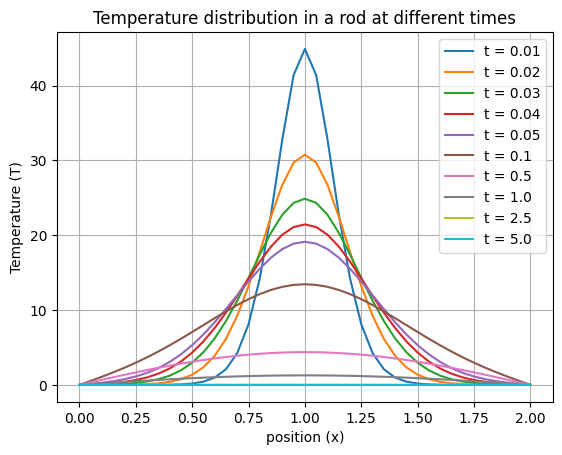

In [10]:
x_i_qn3 = 0   # Initial position of the end of the rod
x_f_qn3 = 2   # Final position of the end of the rod
nx_qn3 = 40   # Number of spatial grid points
t_i_qn3 = 0   # Initial time
t_f_qn3 = 10  # Final time
nt_qn3 = 10000 # Number of time grid points

hx = (x_f_qn3 - x_i_qn3)/nx_qn3 # Spatial step size
ht = (t_f_qn3 - t_i_qn3)/nt_qn3 # Time step size

alpha_qn3 = ht/(hx**2)

print("The value of alpha is: ", round(alpha_qn3,4)," which is less than 0.5" )

def g(x):
    if x==1:
        return 300
    else:
        return 0


def a(t):
    return 0

def b(t):
    return 0


import matplotlib.pyplot as plt
for i in [10,20,30,40,50,100,500,1000,2500,5000]:
    xlist_qn3, Tlist_qn3, tlist_qn3 = pde_explicit_solve(g,a,b,x_i_qn3,x_f_qn3,t_i_qn3,t_f_qn3,nx_qn3,nt_qn3,i)
    plt.plot(xlist_qn3,Tlist_qn3,label = "t = "+str(tlist_qn3[-1]))
    del xlist_qn3, Tlist_qn3, tlist_qn3

plt.legend()
plt.title("Temperature distribution in a rod at different times")
plt.xlabel("position (x)")
plt.ylabel("Temperature (T)")    
plt.grid()
plt.show()


## Question-4

we have the mass density as:
\begin{equation}
\lambda (x) = x^2
\end{equation}

so $dm = \lambda (x) dx = x^2 dx$

the center of mass is given by:
\begin{equation}
\bar{x} = \frac{\int x \lambda (x) dx}{\int \lambda (x) dx}
\end{equation}

and the integration limit is from 0 to 2, so:
\begin{equation}
COM = \bar{x} = \frac{\int_0^2 x x^2 dx}{\int_0^2 x^2 dx}
\end{equation}


In [ ]:
def lambda_x(x):
    return x**2

def xlambda_x(x):
    return x*lambda_x(x)

a_q2 = 0
b_q2 = 2

I1_qn4 = simpsons(lambda_x, a_q2, b_q2, 1000)
I2_qn4 = simpsons(xlambda_x, a_q2, b_q2, 1000)

COM = I2_qn4/I1_qn4
print("The center of mass of the Rod is at: ", f'{COM:.4f}', "m")

The center of mass of the Rod is at:  1.5000 m


## Question-5

In [17]:
from prettytable import PrettyTable

file = open('C:\\Users\\apmna\\OneDrive\\Documents\\GitHub\\P452_Computational_Physics\\Midsem\\Q5-Input.txt')
lines = file.readlines()
lineindex = 1
while lineindex != len(lines):
    AB = []                                                                            #reading from file 
    while lines[lineindex][0] != '#':
        linelist = lines[lineindex].split(',')
        for i in range(len(linelist)):
            linelist[i]= float(linelist[i])
        lineindex += 1
        AB.append(linelist)
    lineindex += 1
    A = []
    while lines[lineindex][0] != '#':
        linelist = lines[lineindex].split(',')
        for i in range(len(linelist)):
            linelist[i]= float(linelist[i])
        lineindex += 1
        A.append(linelist)
    lineindex += 1
    B = []
    while lines[lineindex][0] != '#':
        linelist = lines[lineindex].split(',')
        for i in range(len(linelist)):
            linelist[i]= float(linelist[i])
        lineindex += 1
        B.append(linelist)
    lineindex += 1

Q5_ans = LU_Solve_eqn(A,B)

print("The solution from the LU decomposition is tabulated below:")

p = PrettyTable()
varlist=["a1","a2","a3","a4","a5","a6"]
p.field_names = ["Variable", "solution"]

for i in range(len(varlist)):
    p.add_row([varlist[i],round(Q5_ans[i][0],4)])

print(p)    

The solution from the LU decomposition is tabulated below:
+----------+----------+
| Variable | solution |
+----------+----------+
|    a1    | -1.7618  |
|    a2    |  0.8962  |
|    a3    |  4.0519  |
|    a4    | -1.6171  |
|    a5    |  2.0419  |
|    a6    |  0.1518  |
+----------+----------+
